In [106]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [107]:
df = pd.read_excel("premiums_young_with_gr.xlsx")
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


In [108]:
df.shape

(20096, 14)

In [109]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount', 'Genetical_Risk'],
      dtype='object')

In [110]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [111]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [112]:
df.dropna(inplace=True)

### Handle NA Values

In [113]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [114]:
df.duplicated().sum()

np.int64(0)

In [115]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


In [116]:
df[df["number_of_dependants"] < 0]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
150,23,Female,Southwest,Unmarried,-3,Underweight,No Smoking,Freelancer,10L - 25L,18,No Disease,Silver,9309,2
871,18,Male,Southwest,Unmarried,-3,Overweight,No Smoking,Freelancer,25L - 40L,28,No Disease,Silver,8095,0
906,19,Male,Northwest,Unmarried,-3,Underweight,No Smoking,Freelancer,25L - 40L,40,No Disease,Bronze,4641,1
2462,20,Male,Northeast,Unmarried,-3,Underweight,Regular,Freelancer,10L - 25L,20,Diabetes,Silver,9640,1
3059,20,Female,Southwest,Unmarried,-3,Underweight,No Smoking,Salaried,> 40L,77,No Disease,Silver,9299,2
3120,25,Male,Northwest,Unmarried,-1,Underweight,No Smoking,Salaried,10L - 25L,13,No Disease,Bronze,7234,3
3780,23,Female,Southeast,Unmarried,-3,Normal,Regular,Freelancer,25L - 40L,40,No Disease,Bronze,5003,0
5593,25,Male,Northwest,Unmarried,-1,Normal,No Smoking,Salaried,10L - 25L,20,No Disease,Bronze,6299,2
7585,22,Male,Northwest,Unmarried,-3,Normal,Occasional,Self-Employed,<10L,8,No Disease,Gold,13596,2
9765,18,Female,Southeast,Unmarried,-1,Underweight,No Smoking,Self-Employed,<10L,4,No Disease,Bronze,9366,5


In [117]:
df['number_of_dependants'].unique()

array([ 0,  2,  1,  3, -3, -1])

In [118]:
df["number_of_dependants"] = abs(df["number_of_dependants"])
df["number_of_dependants"].describe()

count    20090.000000
mean         0.722598
std          0.937200
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: number_of_dependants, dtype: float64

In [119]:
numeric_columns = df.select_dtypes(['float64','int64']).columns

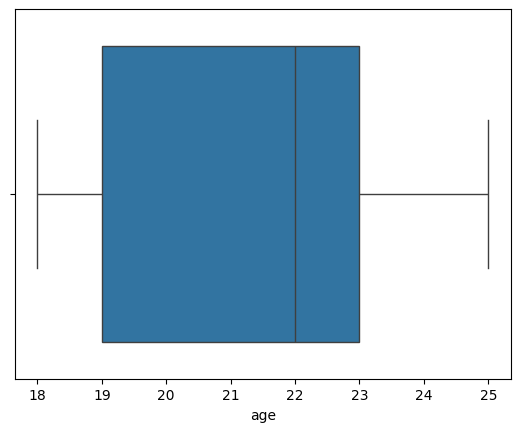

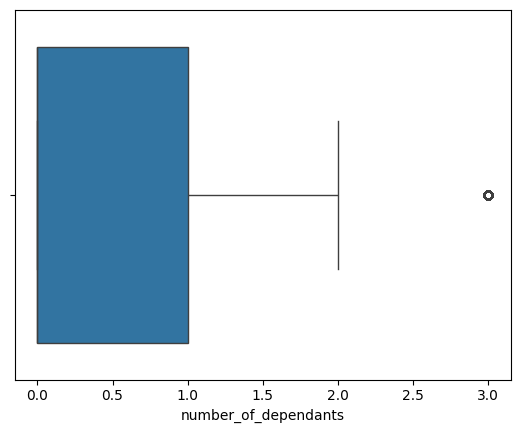

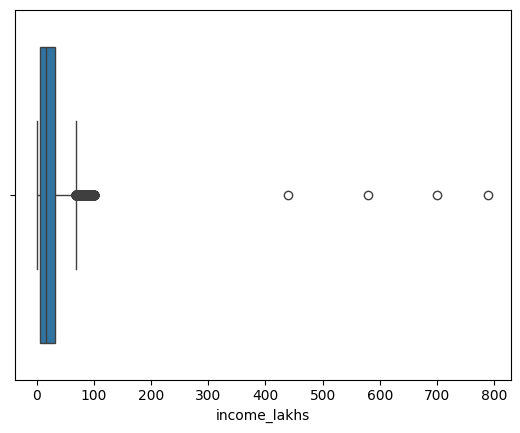

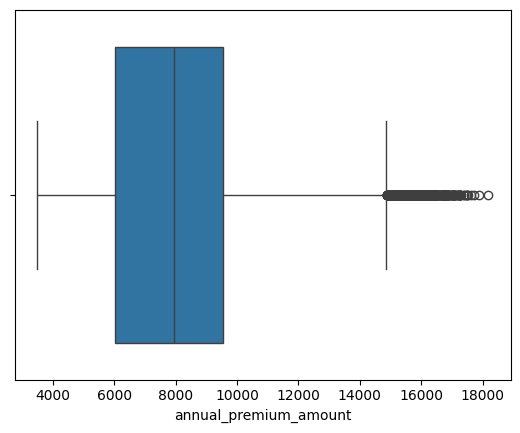

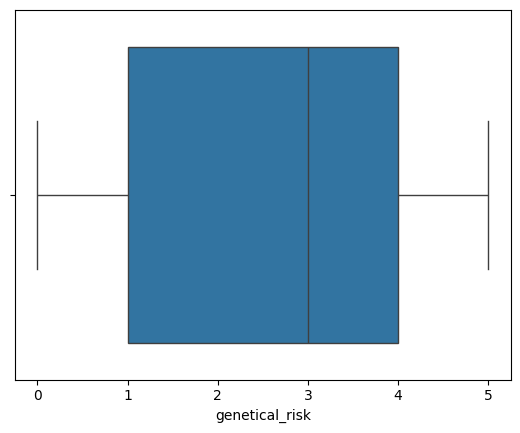

In [120]:
for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.show()

In [121]:
df[df["age"] > 100]["age"].unique()

array([], dtype=int64)

In [122]:
df1 = df[df["age"] < 100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267,2.503932
std,2.294052,0.937200,23.420493,2749.906347,1.710203
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


<Axes: xlabel='income_lakhs', ylabel='Count'>

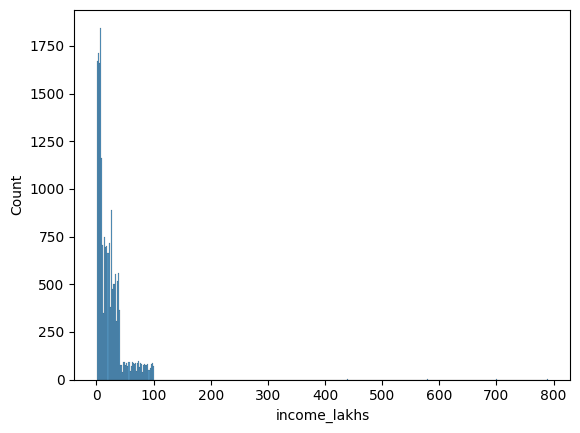

In [123]:
sns.histplot(df1["income_lakhs"])

In [124]:
def get_iqr_bounds(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return lower_bound, upper_bound

In [125]:
get_iqr_bounds(df1["income_lakhs"])

(-31.5, 68.5)

In [126]:
quantile_threshold = df1.income_lakhs.quantile(0.999)

In [127]:
df1[df1["income_lakhs"] > quantile_threshold].shape

(4, 14)

In [128]:
df2 = df1[df["income_lakhs"] < quantile_threshold]
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000
mean,21.494016,0.722449,22.266530,8136.902413,2.503241
std,2.294382,0.937033,21.526939,2748.132286,1.710238
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6019.000000,1.000000
50%,21.000000,0.000000,16.000000,7936.500000,3.000000
75%,23.000000,1.000000,31.000000,9552.750000,4.000000
max,25.000000,3.000000,99.000000,18186.000000,5.000000


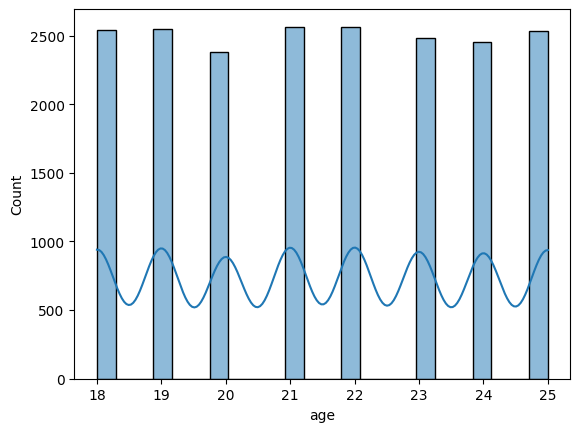

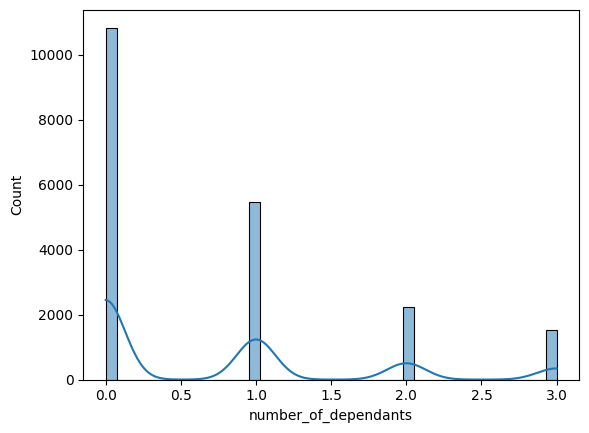

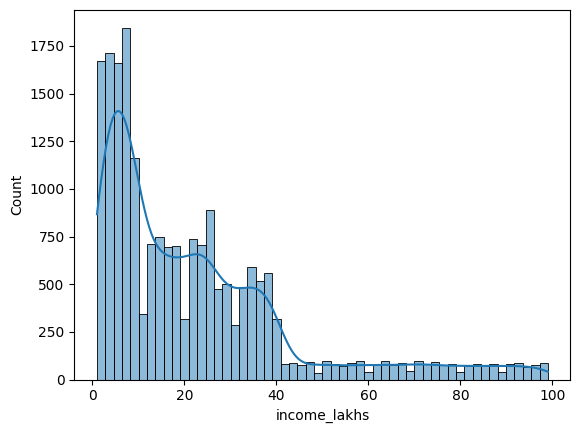

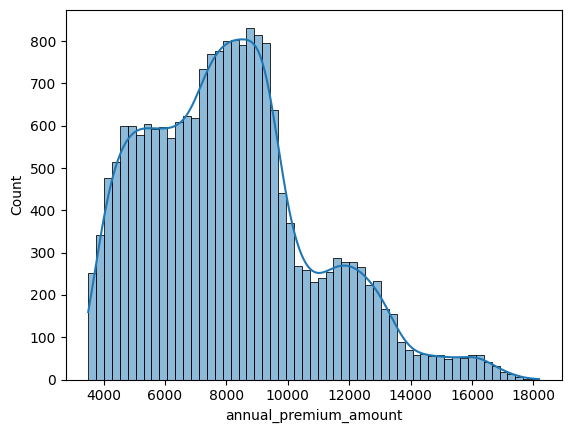

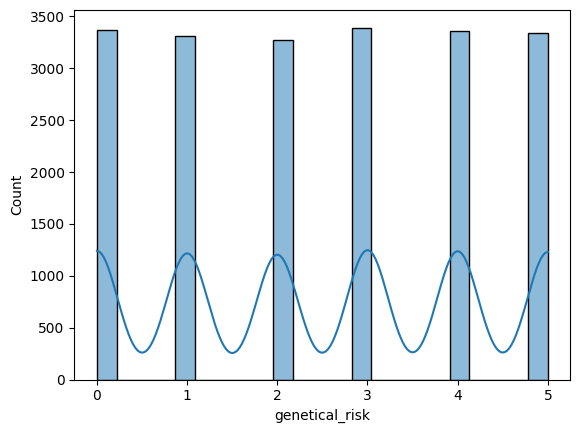

In [129]:
for col in numeric_columns:
    sns.histplot(df2[col],kde=True)
    plt.show()

<Axes: xlabel='age', ylabel='annual_premium_amount'>

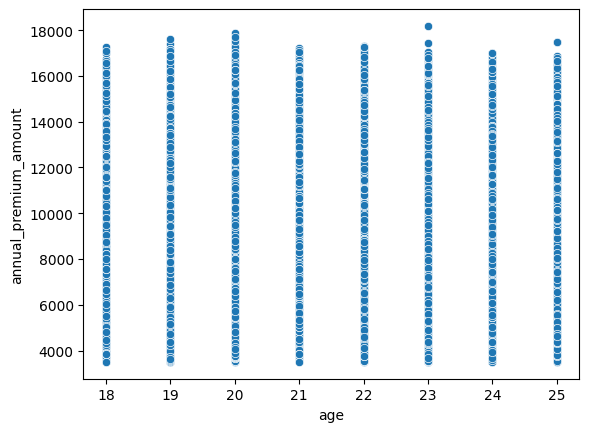

In [130]:
sns.scatterplot(df2,x="age",y="annual_premium_amount")

In [131]:
categorical_columns = df2.columns.difference(numeric_columns)

In [132]:
for col in categorical_columns:
    print(col, ":" , df2[col].unique())

bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
gender : ['Male' 'Female']
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
insurance_plan : ['Silver' 'Bronze' 'Gold']
marital_status : ['Unmarried' 'Married']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
smoking_status : ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']


In [133]:
df2["smoking_status"].replace({
    'Smoking=0' : 'No Smoking',
    'Does Not Smoke' : 'No Smoking',
    'Not Smoking' : 'No Smoking'
}, inplace=True)
df2["smoking_status"].unique()

array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

In [134]:
pct_count = df2["gender"].value_counts(normalize=True)

<Axes: xlabel='gender'>

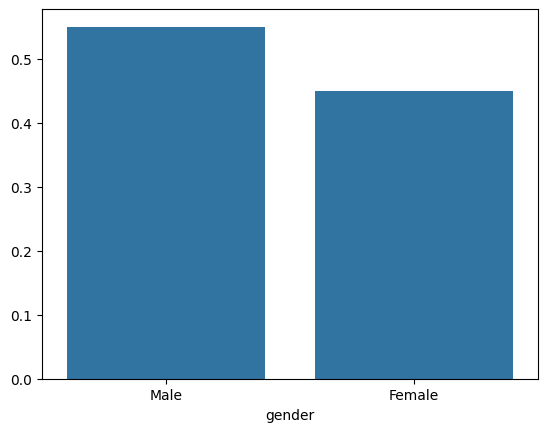

In [135]:
sns.barplot(x = pct_count.index,y = pct_count.values)

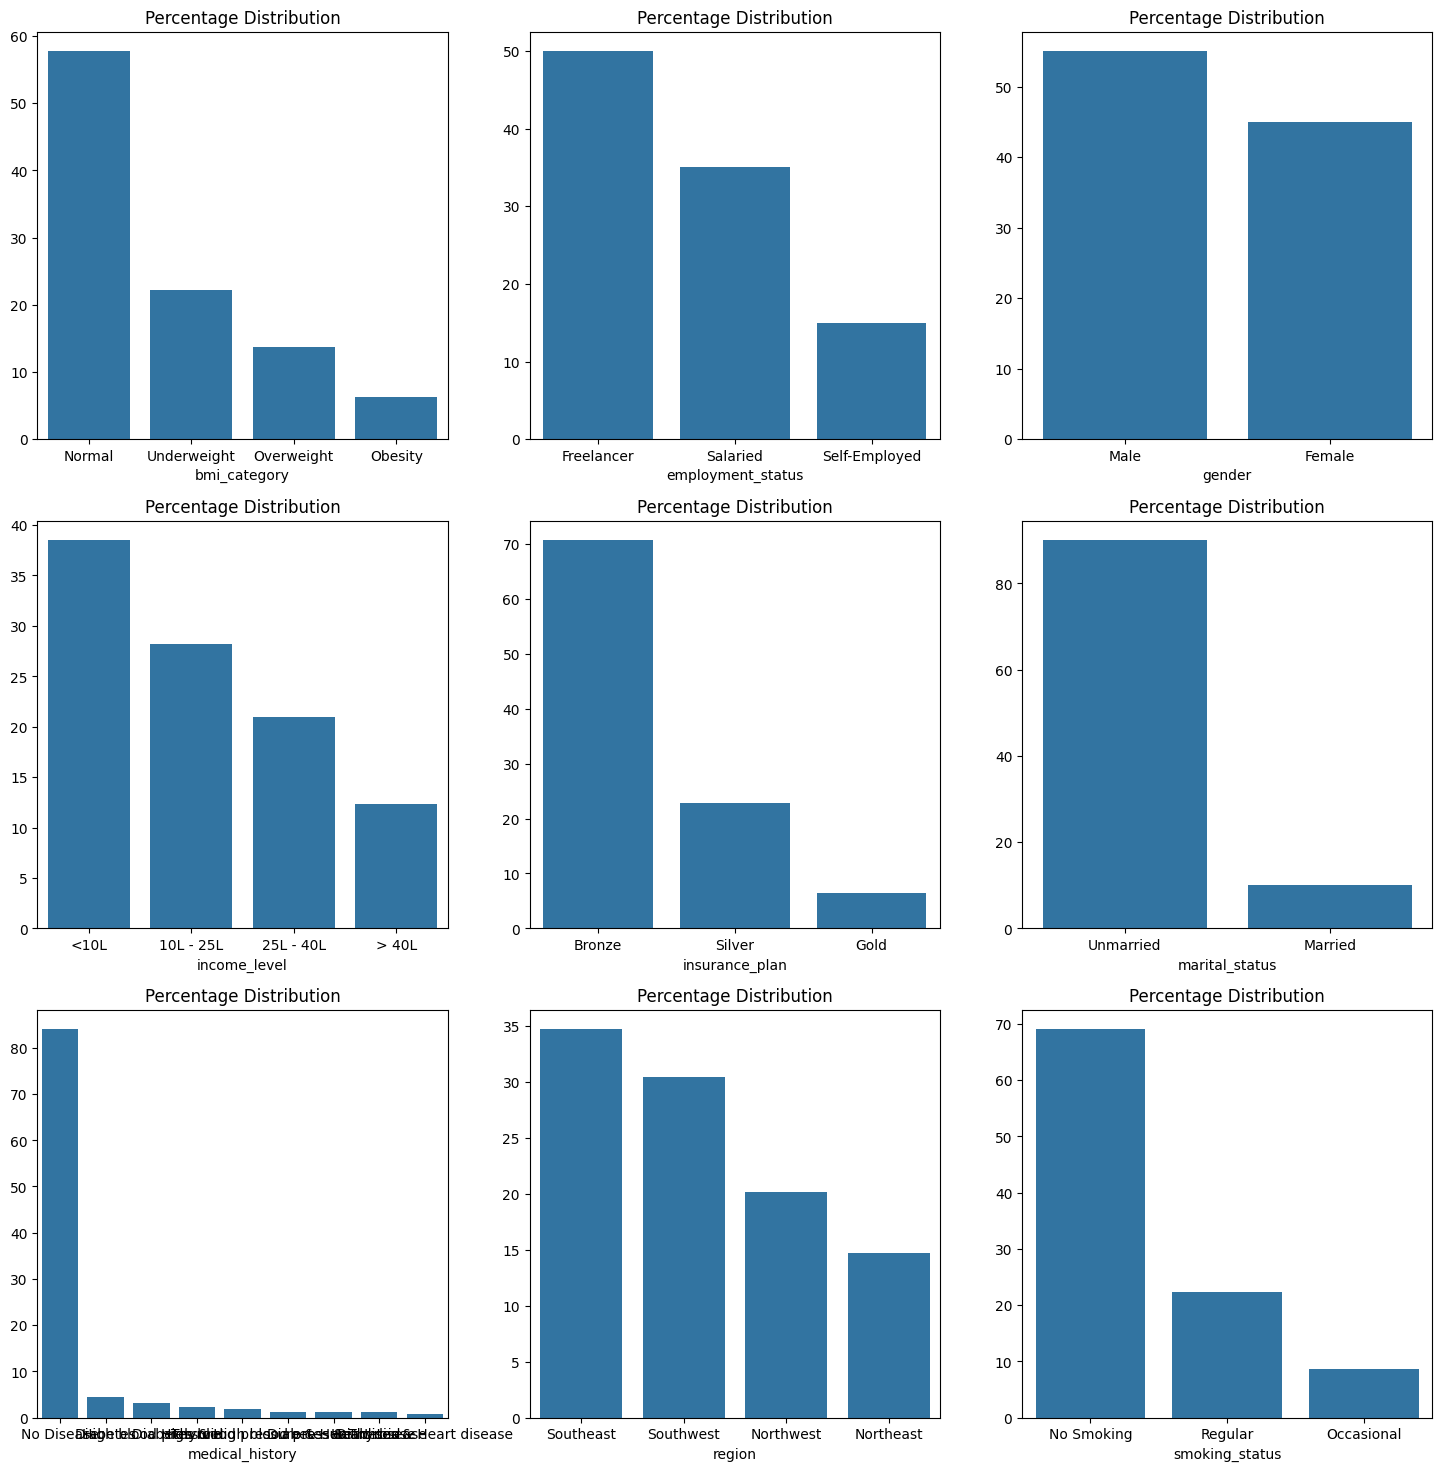

In [136]:
fig, axes = plt.subplots(3,3, figsize=(18,18))
axes = axes.flatten()

for axes, col in zip(axes,categorical_columns):
     pct_count = df2[col].value_counts(normalize=True) * 100
     sns.barplot(x = pct_count.index,y = pct_count.values,ax=axes)
     axes.set_title("Percentage Distribution")
plt.show()

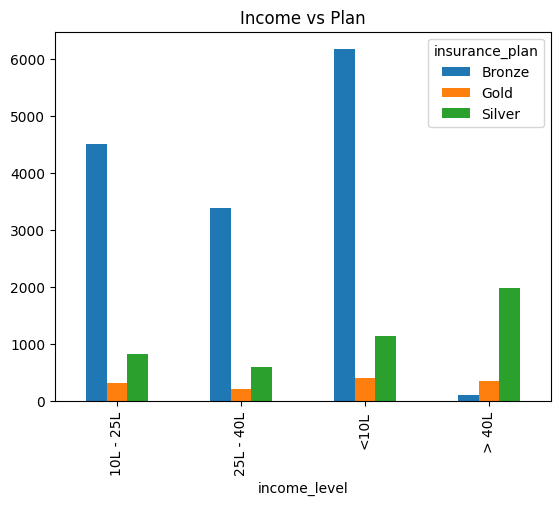

In [137]:
crosstab = pd.crosstab(df2["income_level"],df2["insurance_plan"])
crosstab.plot(kind="bar")
plt.title("Income vs Plan")
plt.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

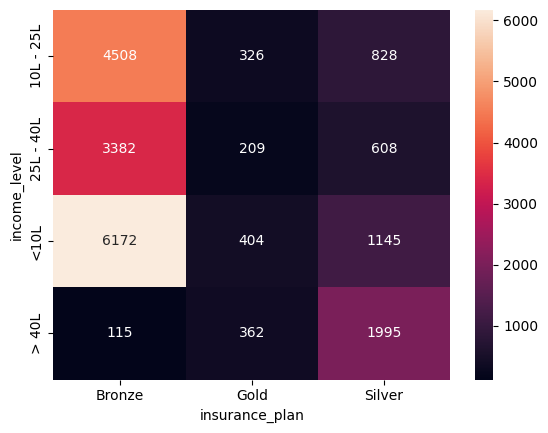

In [138]:
sns.heatmap(crosstab,annot=True,fmt='d')

In [139]:
df2.medical_history.unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [140]:
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none": 0
}
df2[['disease1','disease2']] = df2["medical_history"].str.split(" & ",expand=True).apply(lambda x: x.str.lower())

In [141]:
df2

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,None
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,None
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,no disease,None
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2,no disease,None
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1,no disease,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20091,18,Female,Southeast,Unmarried,0,Underweight,No Smoking,Freelancer,> 40L,91,No Disease,Gold,11603,1,no disease,None
20092,23,Female,Northwest,Unmarried,0,Obesity,Occasional,Freelancer,> 40L,57,Diabetes,Gold,14498,2,diabetes,None
20093,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,Bronze,9111,5,no disease,None
20094,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,No Disease,Bronze,8564,4,no disease,None


In [142]:
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0

for disease in ['disease1','disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

max_score = df2["total_risk_score"].max()
min_score = df2["total_risk_score"].min()

df2["normalized_risk_score"] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1,no disease,none,0,0.000000


In [143]:
df2.insurance_plan.unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [144]:
df2["insurance_plan"] = df2["insurance_plan"].map({
    "Bronze":1,
    "Silver":2,
    "Gold":3
})

df2["income_level"] = df2["income_level"].map({'<10L':1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,4,99,High blood pressure,2,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,1,3,No Disease,2,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,4,97,No Disease,2,11857,4,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,2,15,No Disease,1,5684,2,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,2,14,No Disease,1,5712,1,no disease,none,0,0.000000


In [145]:
nominal_columns = ["gender","region","marital_status","bmi_category","smoking_status","employment_status"]
df3 = pd.get_dummies(df2, columns=nominal_columns,drop_first=True, dtype=int)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,High blood pressure,2,13365,4,high blood pressure,none,...,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,No Disease,2,11050,3,no disease,none,...,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,No Disease,2,11857,4,no disease,none,...,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,No Disease,1,5684,2,no disease,none,...,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,No Disease,1,5712,1,no disease,none,...,1,0,1,0,1,0,0,0,0,0


In [146]:
df4 = df3.drop(['medical_history','disease1','disease2','total_risk_score'],axis=1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,2,11857,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,1,5684,2,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,1,5712,1,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


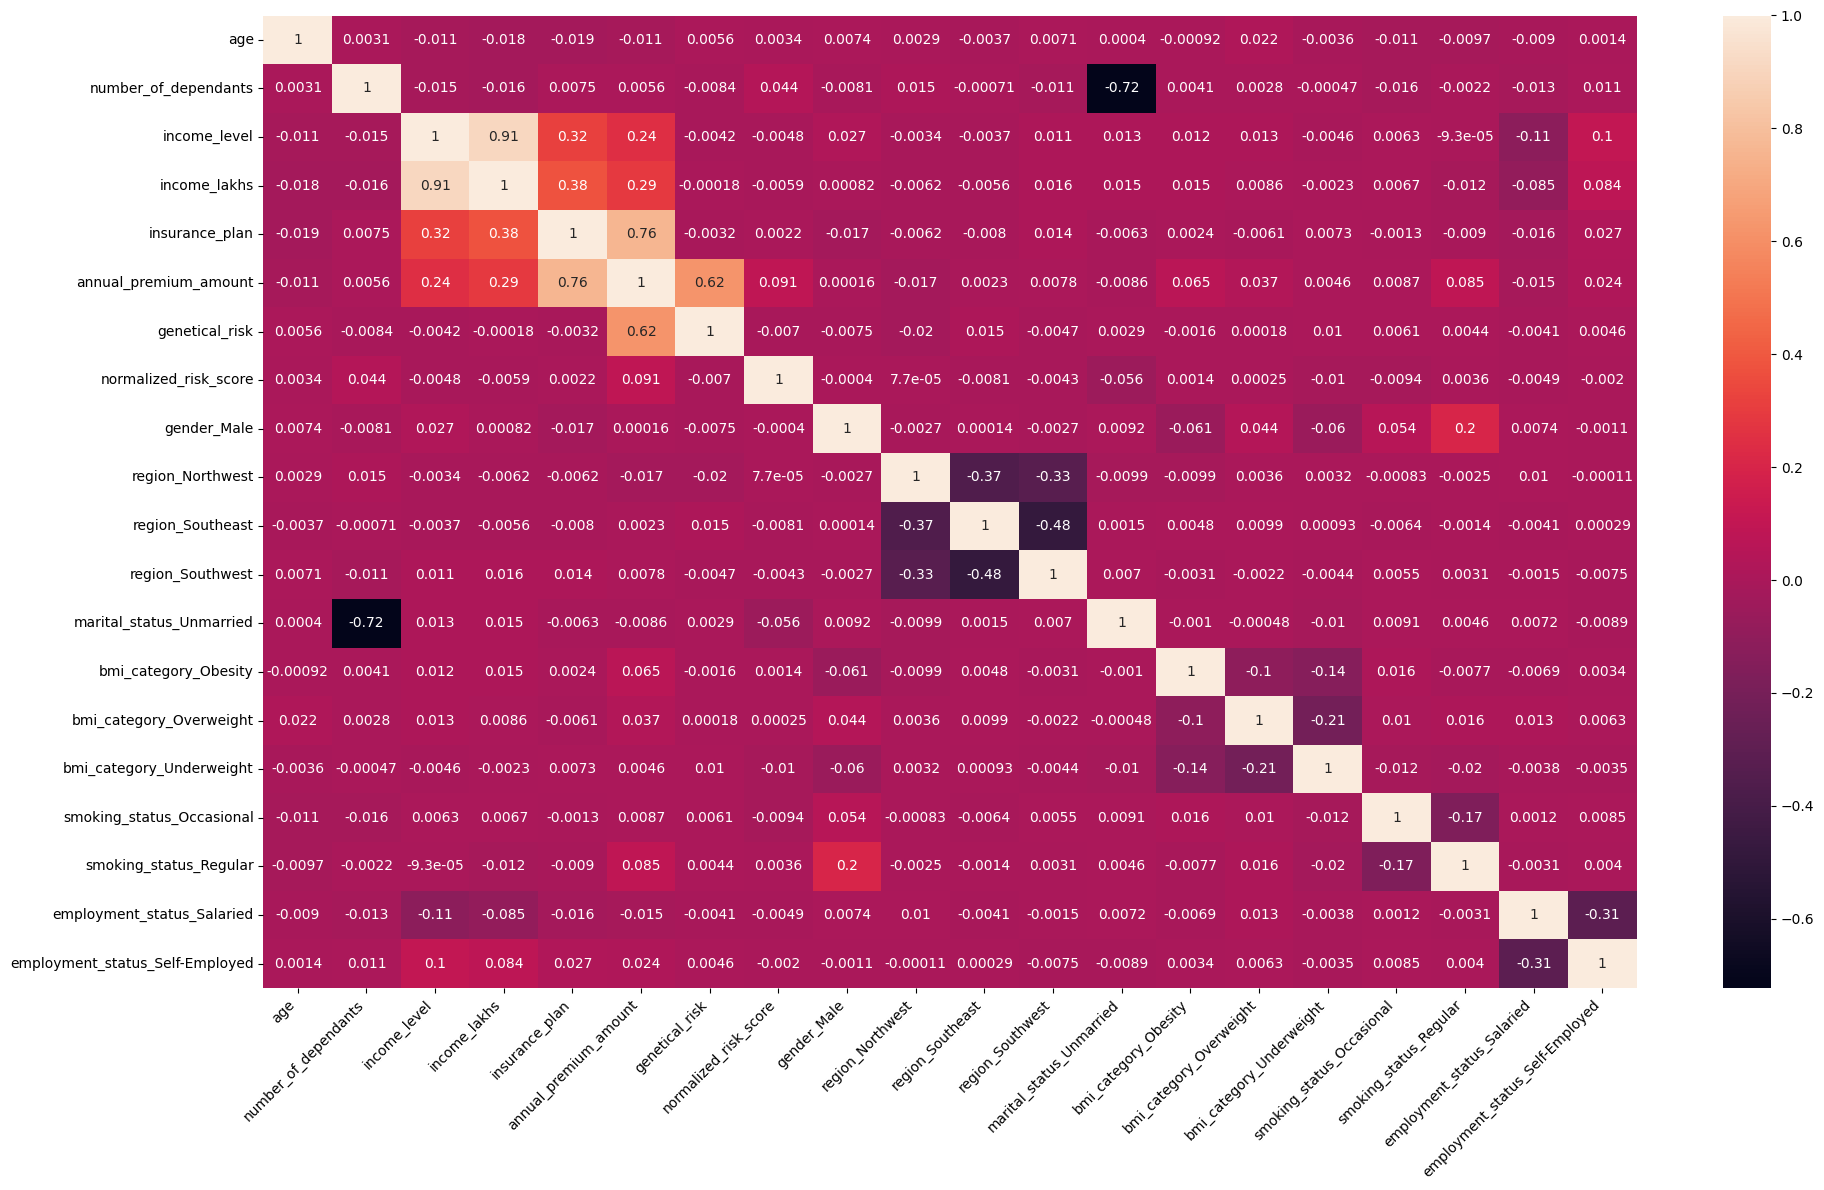

In [147]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [148]:
X = df4.drop('annual_premium_amount', axis='columns')
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler
col_to_scale = ['age','number_of_dependants','income_level','income_lakhs','insurance_plan','genetical_risk']
scaler = MinMaxScaler()

X[col_to_scale] = scaler.fit_transform(X[col_to_scale])
X

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,1.000000,1.000000,0.5,0.8,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.000000,0.020408,0.5,0.6,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,1.000000,0.979592,0.5,0.8,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.333333,0.142857,0.0,0.4,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.333333,0.132653,0.0,0.2,0.000000,1,0,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20091,0.000000,0.000000,1.000000,0.918367,1.0,0.2,0.000000,0,0,1,0,1,0,0,1,0,0,0,0
20092,0.714286,0.000000,1.000000,0.571429,1.0,0.4,0.428571,0,1,0,0,1,1,0,0,1,0,0,0
20093,0.857143,0.000000,0.666667,0.346939,0.0,1.0,0.000000,0,1,0,0,1,0,0,1,0,0,0,1
20094,0.428571,0.000000,0.666667,0.316327,0.0,0.8,0.000000,1,1,0,0,1,0,0,0,0,1,0,0


In [149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df["Column"] = data.columns
    vif_df["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [150]:
calculate_vif(X)

,Column,VIF
0,age,3.154003
1,number_of_dependants,1.929843
2,income_level,12.076236
3,income_lakhs,12.066070
4,insurance_plan,1.587040
5,genetical_risk,2.979519
6,normalized_risk_score,1.154598
7,gender_Male,2.311741
8,region_Northwest,2.153798
9,region_Southeast,2.988985


In [151]:
calculate_vif(X.drop("income_level",axis="columns"))

,Column,VIF
0,age,3.152594
1,number_of_dependants,1.927345
2,income_lakhs,2.295899
3,insurance_plan,1.581741
4,genetical_risk,2.979517
5,normalized_risk_score,1.154563
6,gender_Male,2.301517
7,region_Northwest,2.152910
8,region_Southeast,2.987812
9,region_Southwest,2.743533


In [152]:
X_reduced = X.drop("income_level",axis="columns")

### Model Training

In [153]:
x_train,x_test,y_train,y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=10)

In [154]:
model_liner = LinearRegression()
model_liner.fit(x_train,y_train)
model_liner.score(x_test,y_test)

0.9883024425745823

In [155]:
y_pred = model_liner.predict(x_test)

mse_lr = mean_squared_error(y_test,y_pred)
rmse_lr = np.sqrt(mse_lr)
print("XGBoost Regression ==> MSE: ",mse_lr," RMSE: ",rmse_lr)

XGBoost Regression ==> MSE:  88813.45140723397  RMSE:  298.0158576439079


In [156]:
model_liner.coef_, model_liner.intercept_

(array([-6.07009916e+00,  5.05214522e+00, -7.45274752e+00,  7.00494096e+03,
         4.99109246e+03,  1.11479443e+03,  4.93797939e+00,  6.51640518e+00,
        -3.84458025e+00,  5.55789282e+00, -2.91905776e+00,  8.10591557e+02,
         4.07171235e+02,  1.10207314e+02,  2.00886429e+02,  6.12475040e+02,
        -1.25939895e+00, -7.52704515e+00]),
 np.float64(3997.399023656866))

In [157]:
feature_importances = model_liner.coef_

coef_df = pd.DataFrame(feature_importances, index=x_test.columns,columns=['Coefficients'])

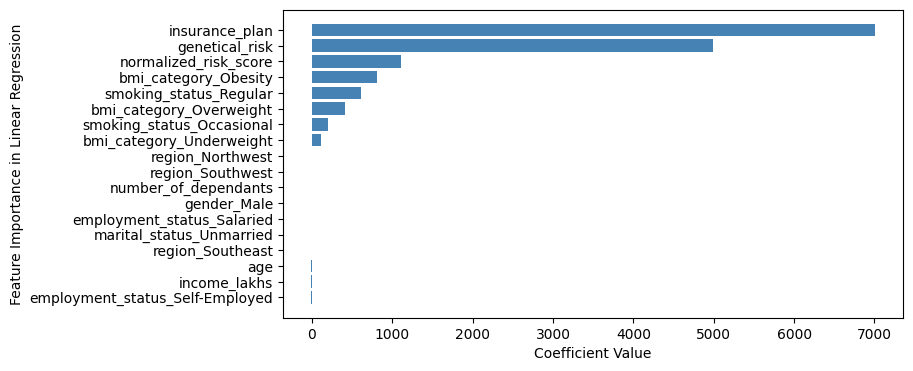

In [158]:
coef_df = coef_df.sort_values(by="Coefficients", ascending=True)
plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Importance in Linear Regression')
plt.show()

In [159]:
model_ridge = Ridge(alpha=10)
model_ridge.fit(x_train,y_train)
model_ridge.score(x_test,y_test)

0.9882631002194945

In [160]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(x_train,y_train)
model_xgb.score(x_test,y_test)

0.9874721169471741

In [161]:
y_pred = model_xgb.predict(x_test)

mse_lr = mean_squared_error(y_test,y_pred)
rmse_lr = np.sqrt(mse_lr)
print("XGBoost Regression ==> MSE: ",mse_lr," RMSE: ",rmse_lr)

XGBoost Regression ==> MSE:  95117.703125  RMSE:  308.4115807245247


In [162]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)
random_search.best_score_

np.float64(0.9880211551984152)

In [163]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [164]:
best_model = random_search.best_estimator_

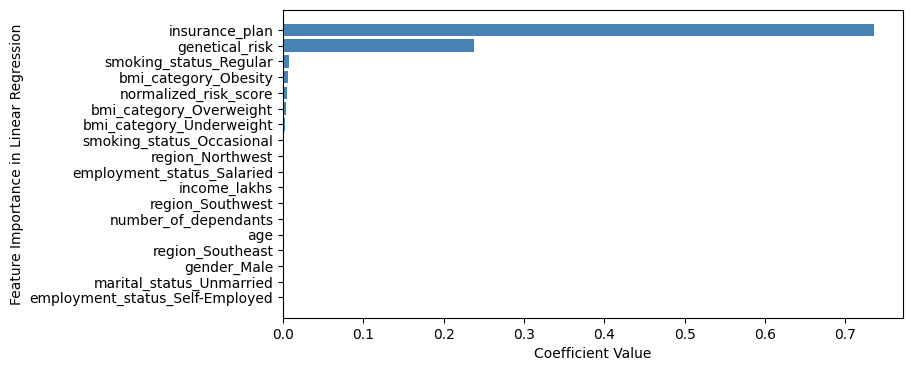

In [165]:
feature_importances = best_model.feature_importances_

coef_df = pd.DataFrame(feature_importances, index=x_test.columns,columns=['Coefficients'])
coef_df = coef_df.sort_values(by="Coefficients", ascending=True)
plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Importance in Linear Regression')
plt.show()

### Error Analysis 

In [166]:
y_pred = best_model.predict(x_test)

residuals = y_pred - y_test
residuals_pct = residuals*100/y_test

results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'diff': residuals,
    'percentage': residuals_pct
})
results_df.head()

,actual,predicted,diff,percentage
1710,4096,4424.137695,328.137695,8.011174
11963,4503,4424.137695,-78.862305,-1.751328
8719,8332,8172.020508,-159.979492,-1.920061
7208,11578,11518.022461,-59.977539,-0.518030
9416,7045,7038.253418,-6.746582,-0.095764


<Axes: xlabel='percentage', ylabel='Count'>

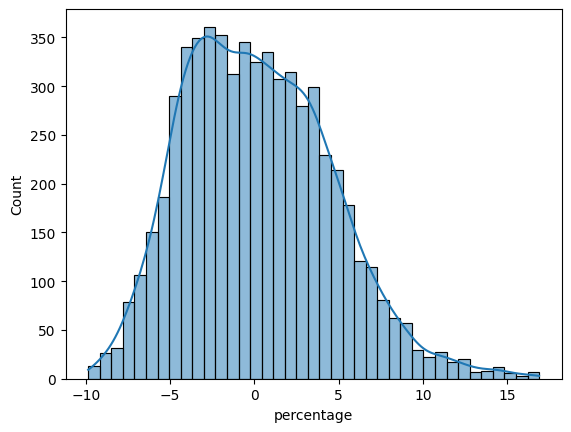

In [167]:
sns.histplot(results_df['percentage'],kde=True)

In [168]:
extreme_error_threshold = 50 
extreme_results_df = results_df[np.abs(results_df["percentage"]) > extreme_error_threshold]

In [169]:
extreme_results_df.shape

(0, 4)

In [170]:
extreme_pct = extreme_results_df.shape[0]*100/results_df.shape[0]
extreme_pct

0.0

In [171]:
results_df[np.abs(results_df["percentage"]) > 50].sort_values('percentage',ascending=False)

,actual,predicted,diff,percentage


In [172]:
extreme_errors_df = x_test.loc[extreme_results_df.index]

In [173]:
extreme_errors_df

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed


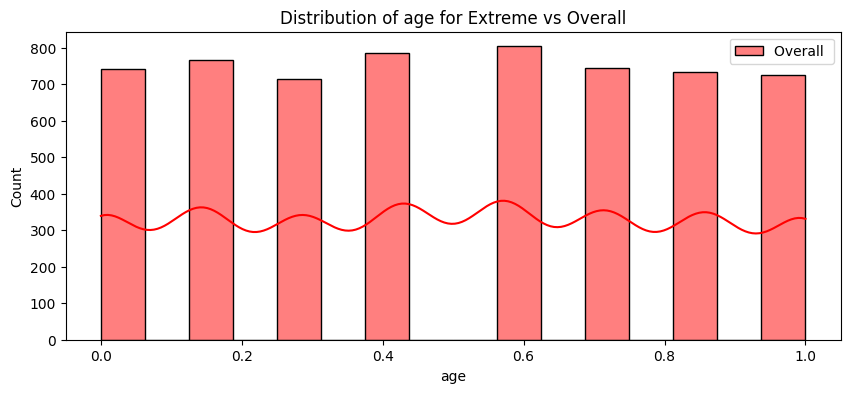

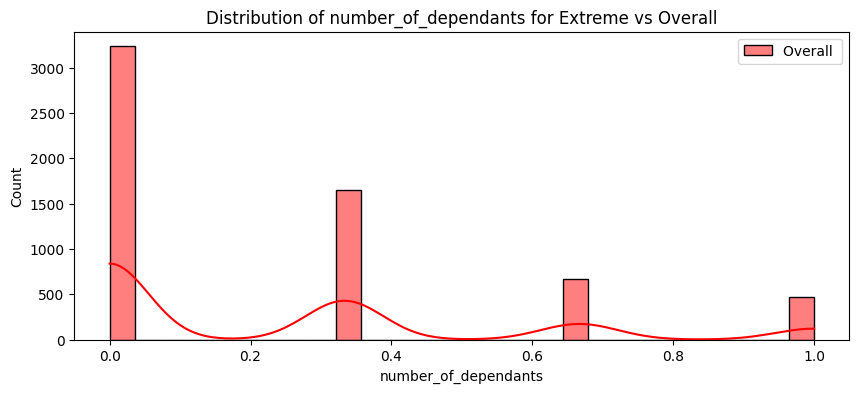

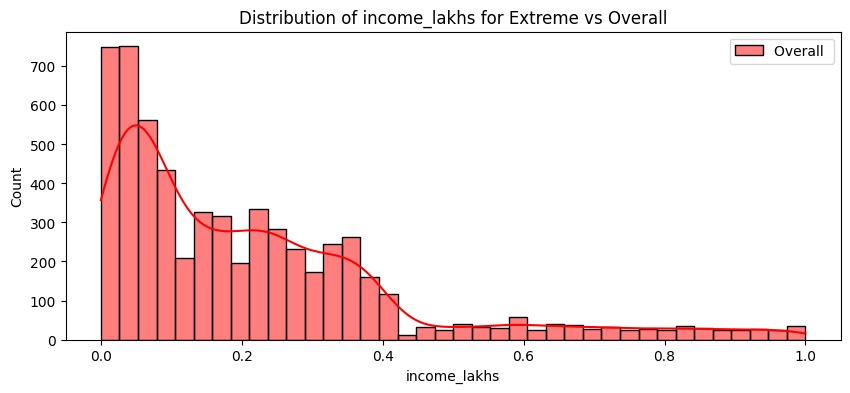

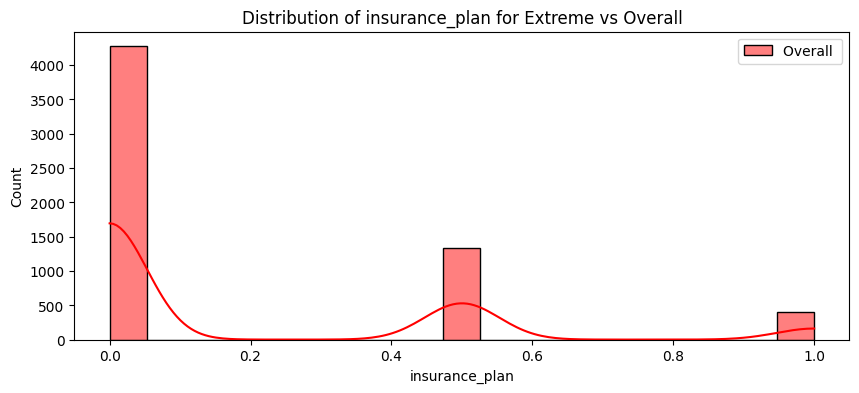

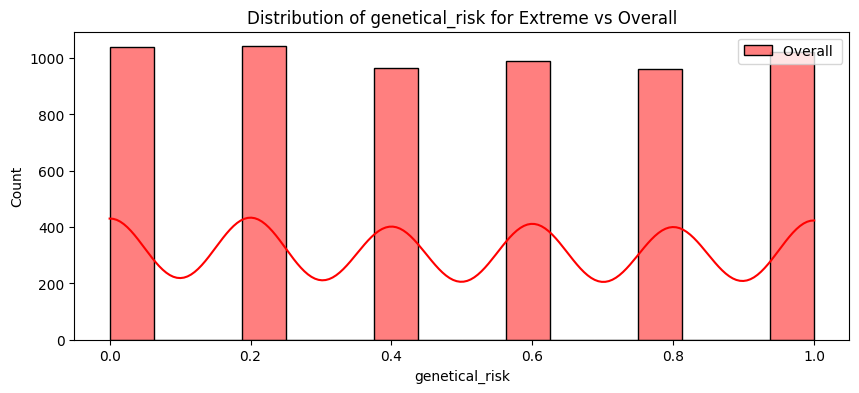

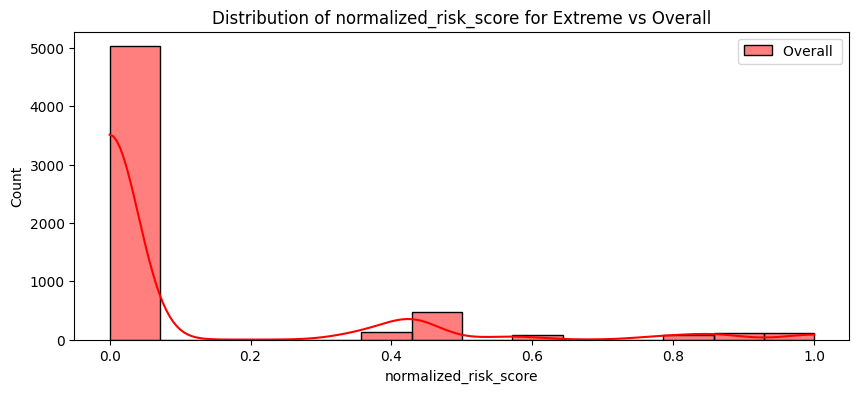

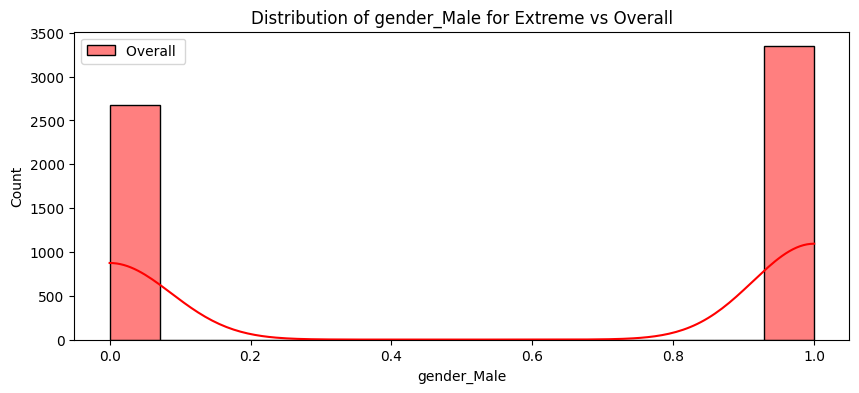

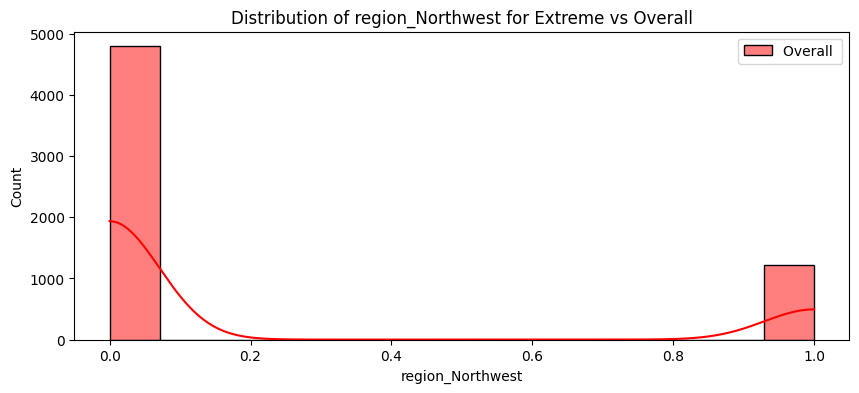

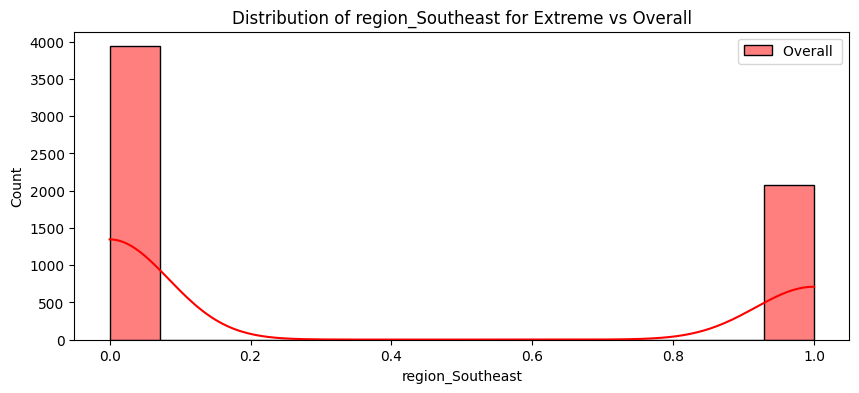

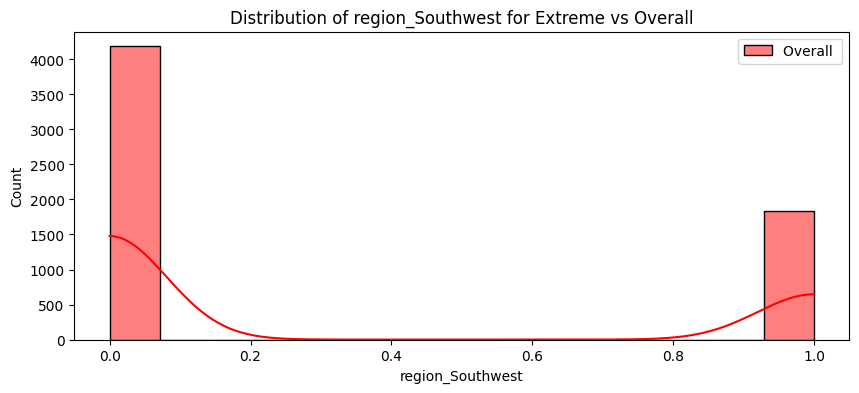

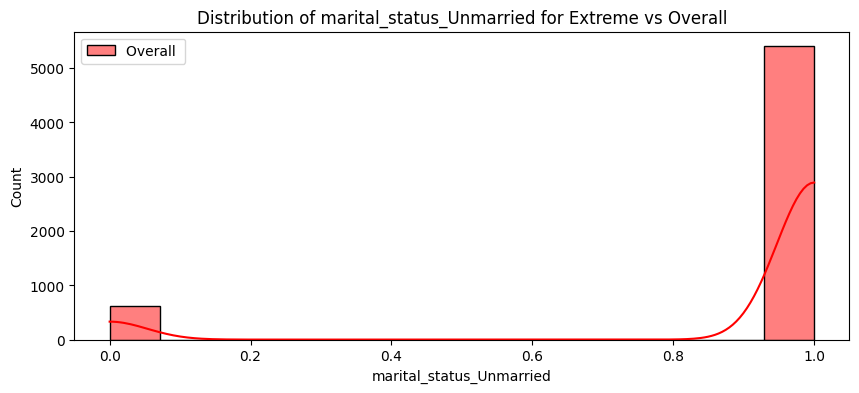

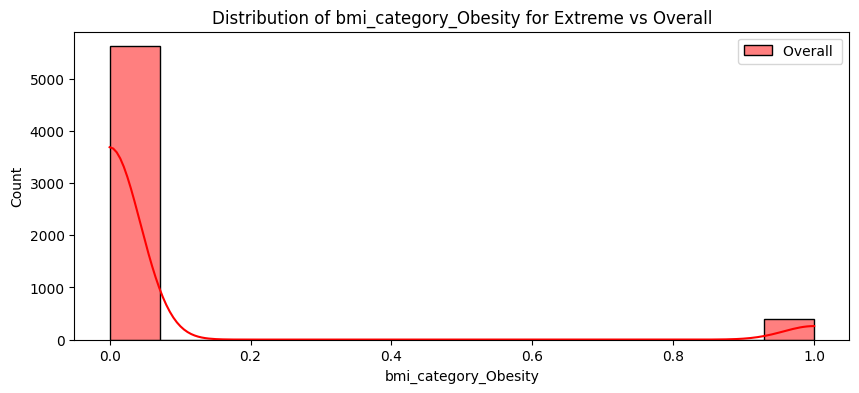

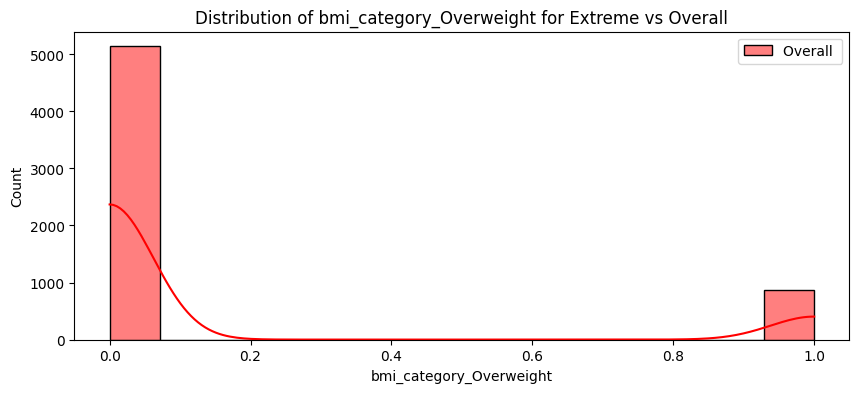

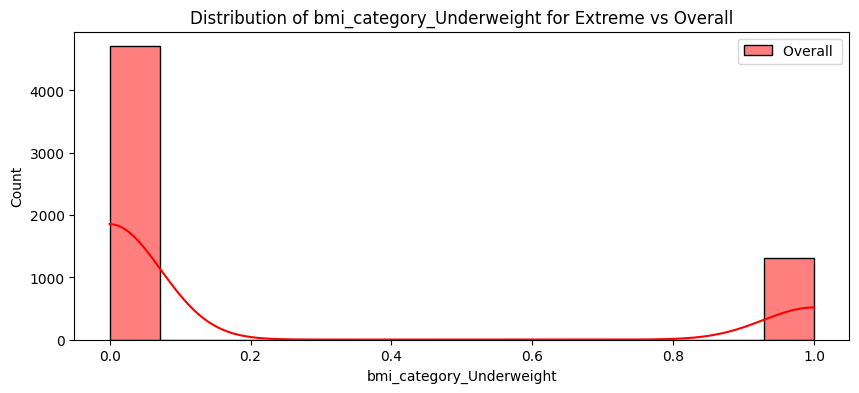

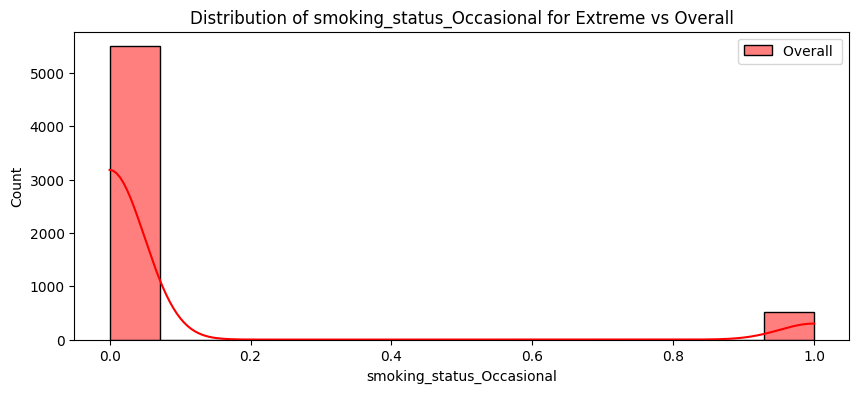

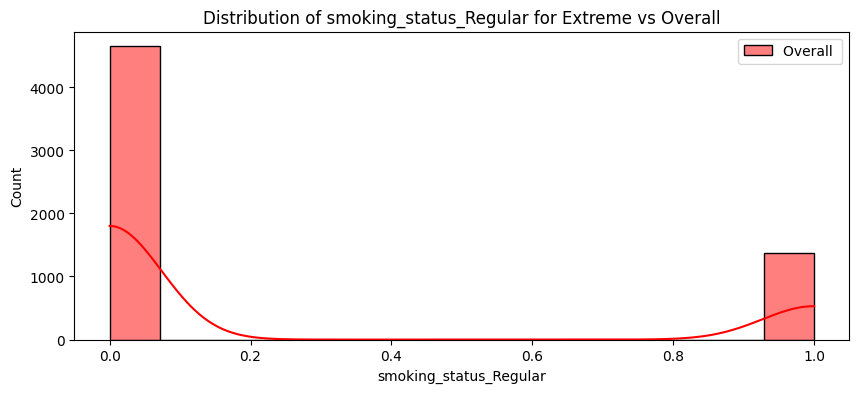

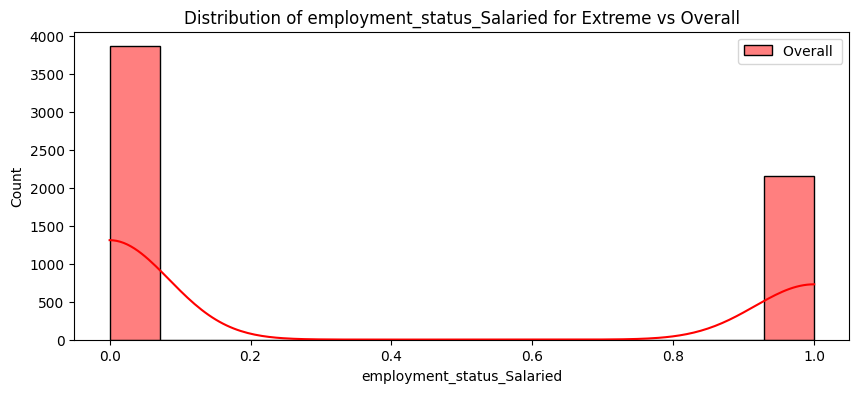

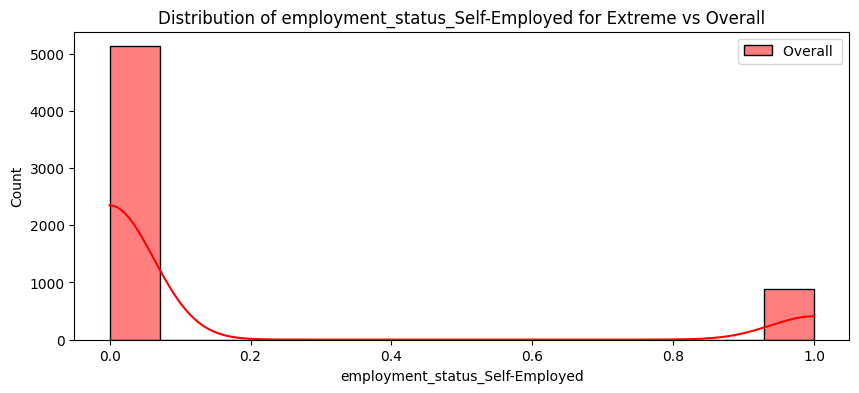

In [174]:
for feature in x_test.columns:
    plt.figure(figsize=(10,4))
    sns.histplot(x_test[feature],label="Overall ",kde=True,color='red')
    sns.histplot(extreme_errors_df[feature],label="Extreme Errors",kde=True,color='blue')
    plt.legend()
    plt.title(f"Distribution of {feature} for Extreme vs Overall")
    plt.show()

### Export the Model

In [175]:
from joblib import dump

dump(best_model, "artifacts/model_young.joblib")

['artifacts/model_young.joblib']

In [177]:
scaler_with_cols = {
    'scaler': scaler,
    'cols_to_scale': col_to_scale
}

dump(scaler_with_cols, 'artifacts/scaler_young.joblib')

['artifacts/scaler_young.joblib']